This notebook contains some analysis of the first BOUT++ model. This is mainly a test, since we have set pretty much every parameter at a value of 1 (like the ion mass, elementary charge, initial conditions etc.).

In [1]:
# import packages
from xbout import open_boutdataset
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook 
# set size for the figures
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams.update({"font.size": 10})

In [4]:
# open dataset and see what's inside
ds = open_boutdataset('D:/MSc/OneDrive - University of York/MSc/project/BOUT files/itg-slab/BOUT.dmp.0_itgshearlesslab.nc', 
                    inputfilepath = 'D:/MSc/OneDrive - University of York/MSc/project/BOUT files/itg-slab/BOUT_itgshearlessslab.inp')

Read in:
<xbout.BoutDataset>
Contains:
<xarray.Dataset>
Dimensions:     (t: 11, x: 64, y: 64, z: 64)
Coordinates:
  * t           (t) float64 0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0
  * x           (x) int32 0 1 2 3 4 5 6 7 8 9 ... 54 55 56 57 58 59 60 61 62 63
  * y           (y) float64 0.1 0.3 0.5 0.7 0.9 1.1 ... 11.9 12.1 12.3 12.5 12.7
  * z           (z) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 11.8 12.0 12.2 12.4 12.6
Data variables: (12/38)
    dx          (x, y) float64 dask.array<chunksize=(64, 64), meta=np.ndarray>
    dy          (x, y) float64 dask.array<chunksize=(64, 64), meta=np.ndarray>
    g11         (x, y) float64 dask.array<chunksize=(64, 64), meta=np.ndarray>
    g22         (x, y) float64 dask.array<chunksize=(64, 64), meta=np.ndarray>
    g33         (x, y) float64 dask.array<chunksize=(64, 64), meta=np.ndarray>
    g12         (x, y) float64 dask.array<chunksize=(64, 64), meta=np.ndarray>
    ...          ...
    ncalls      (t) int32 dask.array<chunksize=(11,),

C:\Users\xrist\anaconda3\lib\site-packages\xbout\load.py:278: UserWarning: No geometry type found, no physical coordinates will be added
  warn("No geometry type found, no physical coordinates will be added")
C:\Users\xrist\anaconda3\lib\site-packages\xbout\geometries.py:152: UserWarning: Size of toroidal domain as calculated from nz*dz (12.8 is not the same as 2pi*(ZMAX - ZMIN) (6.283185307179586): using value from dz
  warn(


<IPython.core.display.Javascript object>


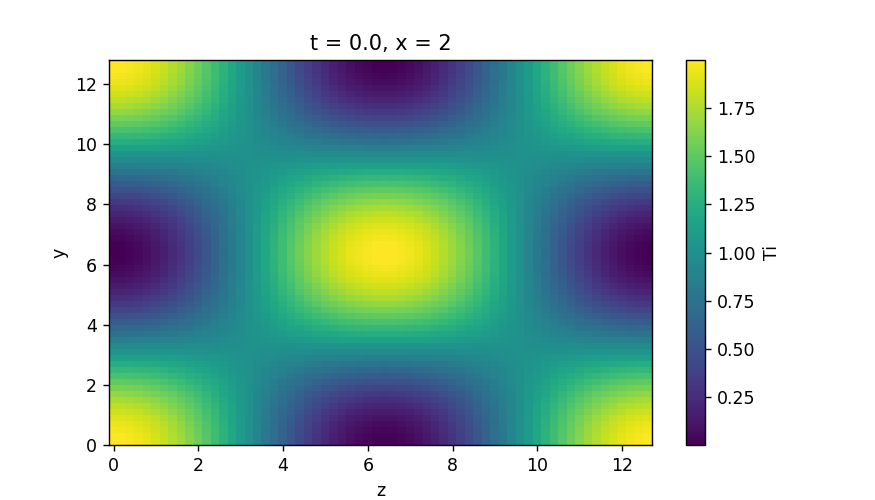

In [5]:
# plot a specific x point at a specific time for the ion temperature
plt.figure()
ds['Ti'].isel(t=0, x=2).plot();

<IPython.core.display.Javascript object>


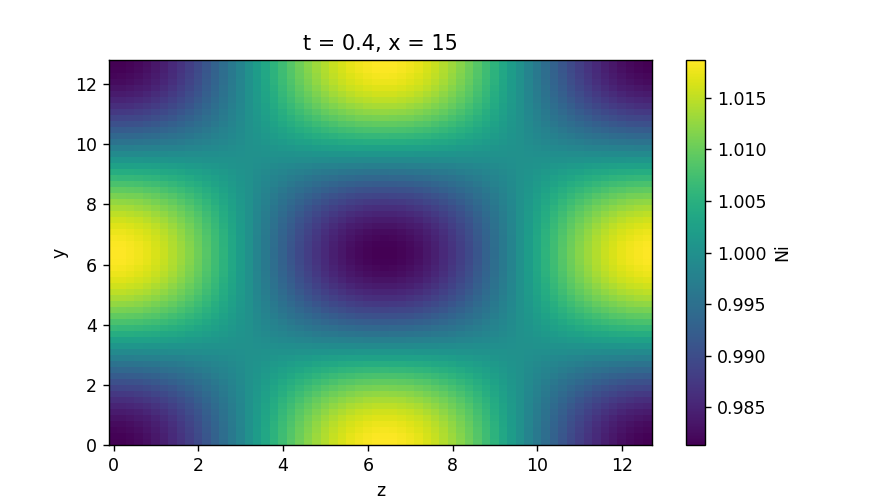

In [6]:
# plot a specific x point at a specific time for the ion density
plt.figure()
ds['Ni'].isel(t=2, x=15).plot();

<IPython.core.display.Javascript object>


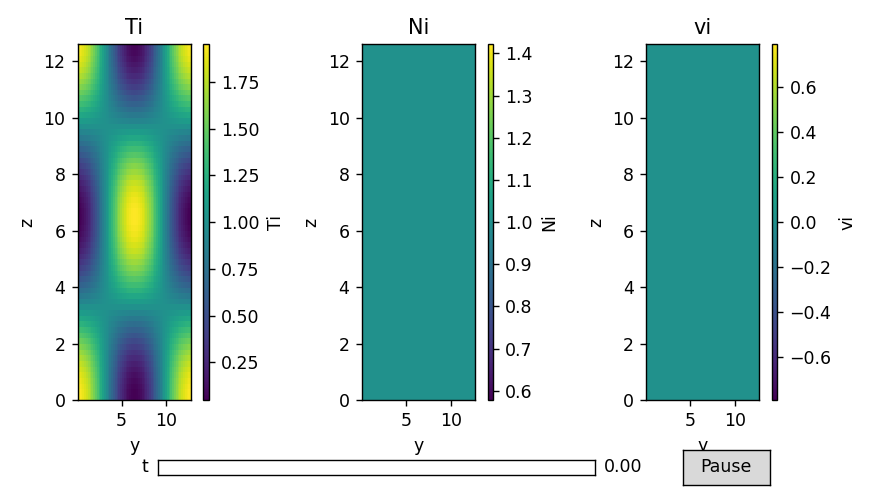

In [26]:

# animate a list of variables
ani = ds.isel(x=20).bout.animate_list(["Ti", "Ni", "vi"], ncols=3);

# save the animation
#ani.save('animation.mp4')

In [10]:
# assign the quantities to variables
Ti = ds['Ti'] # ion temperature
Ni = ds['Ni'] # ion density
vi = ds['vi'] # ion velocity

# check the shape
Ti.shape, Ni.shape, vi.shape

((11, 64, 64, 64), (11, 64, 64, 64), (11, 64, 64, 64))

<IPython.core.display.Javascript object>


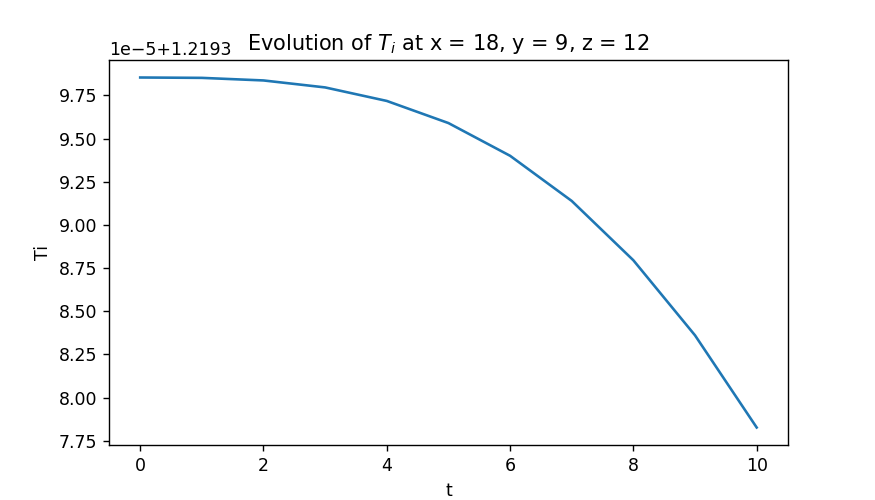

In [29]:
# plot ion temperature at a random point
plt.figure()
plt.plot(Ti[:, 18, 9, 12])
plt.xlabel('t')
plt.ylabel('Ti')
plt.title('Evolution of $T_i$ at x = 18, y = 9, z = 12');

<IPython.core.display.Javascript object>


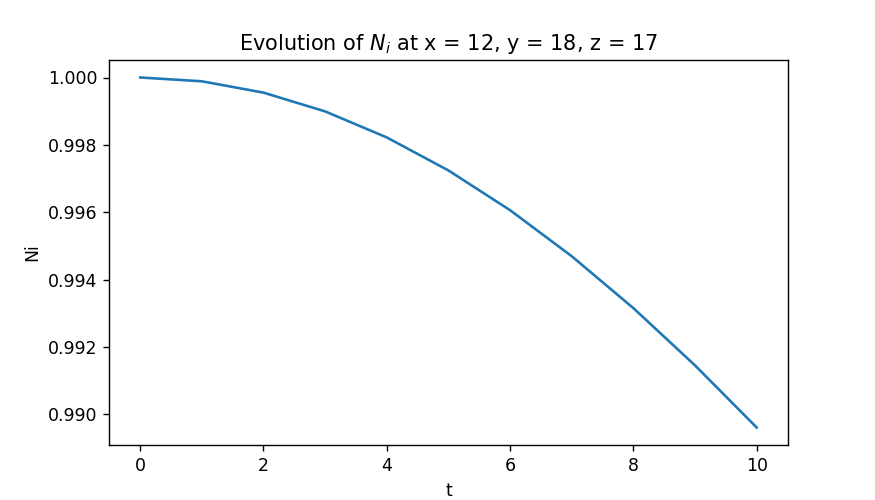

In [30]:
# plot the ion density at a random point
plt.figure()
plt.plot(Ni[:, 12, 18, 17])
plt.xlabel('t')
plt.ylabel('Ni')
plt.title('Evolution of $N_i$ at x = 12, y = 18, z = 17');

<IPython.core.display.Javascript object>


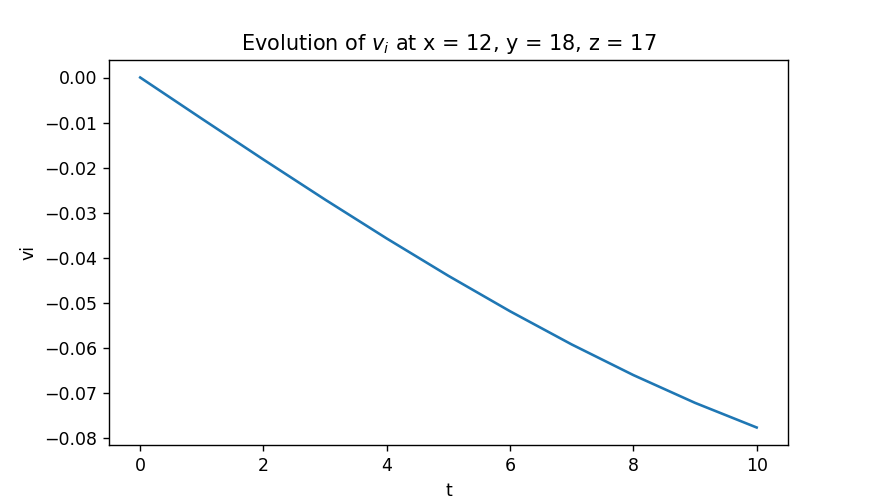

In [31]:
# plot the ion velocity at a random point
plt.figure()
plt.plot(vi[:, 12, 18, 17])
plt.xlabel('t')
plt.ylabel('vi')
plt.title('Evolution of $v_i$ at x = 12, y = 18, z = 17');

In [15]:
phi = ds['phi'] # potential

<IPython.core.display.Javascript object>


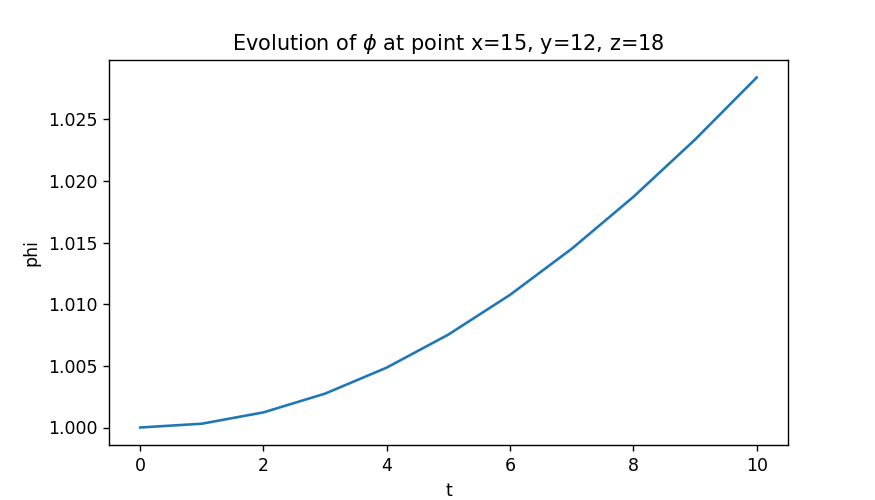

In [28]:
# plot the potential at a random point
plt.figure()
plt.plot(phi[:, 15, 12, 18])
plt.xlabel('t')
plt.ylabel('phi')
plt.title('Evolution of $\phi$ at point x=15, y=12, z=18');

In [21]:
# assign the components of the grad phi
check_grad_phi_x = ds['checkphi.x']
check_grad_phi_y = ds['checkphi.y']
check_grad_phi_z = ds['checkphi.z']

<IPython.core.display.Javascript object>


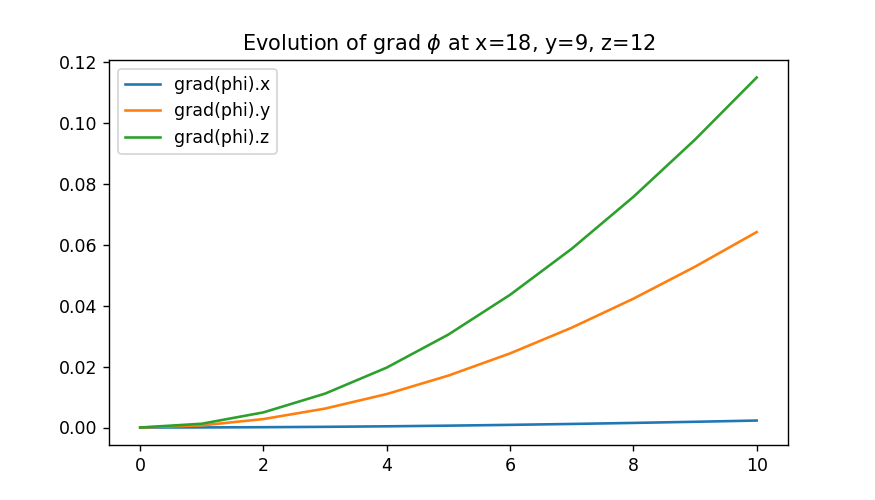

<IPython.core.display.Javascript object>


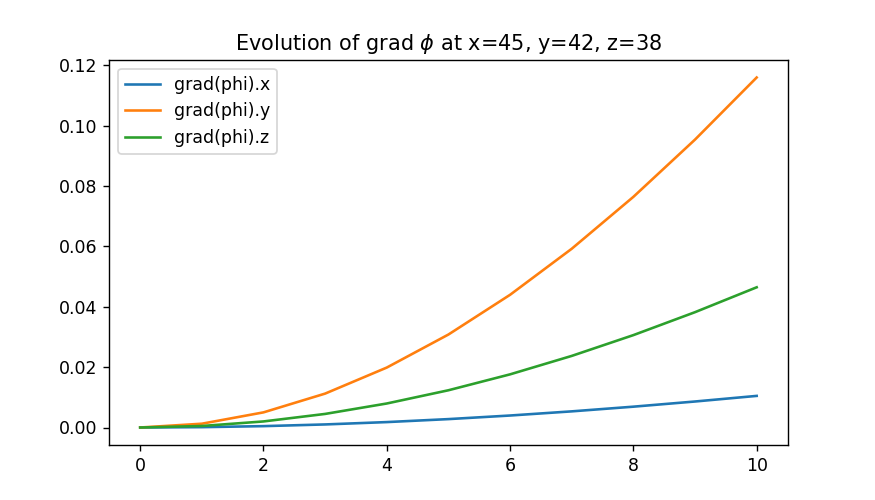

<IPython.core.display.Javascript object>


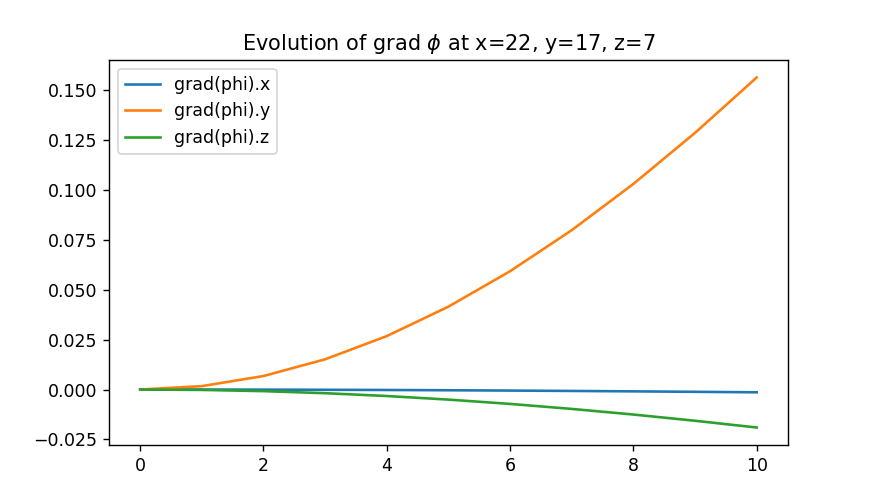

In [35]:
# plot the components of grad phi at random points

plt.figure()
plt.plot(check_grad_phi_x[:, 18, 9, 12], label='grad(phi).x')
plt.plot(check_grad_phi_y[:, 18, 9, 12], label='grad(phi).y')
plt.plot(check_grad_phi_z[:, 18, 9, 12], label='grad(phi).z')
plt.legend()
plt.title('Evolution of grad $\phi$ at x=18, y=9, z=12')
plt.show()


plt.figure()
plt.plot(check_grad_phi_x[:, 45, 42, 38], label='grad(phi).x')
plt.plot(check_grad_phi_y[:, 45, 42, 38], label='grad(phi).y')
plt.plot(check_grad_phi_z[:, 45, 42, 38], label='grad(phi).z')
plt.legend()
plt.title('Evolution of grad $\phi$ at x=45, y=42, z=38')
plt.show()


plt.figure()
plt.plot(check_grad_phi_x[:, 22, 17, 7], label='grad(phi).x')
plt.plot(check_grad_phi_y[:, 22, 17, 7], label='grad(phi).y')
plt.plot(check_grad_phi_z[:, 22, 17, 7], label='grad(phi).z')
plt.legend()
plt.title('Evolution of grad $\phi$ at x=22, y=17, z=7');

In [23]:
# assign the components of the grad Ti
check_grad_Ti_x = ds['checkTi.x']
check_grad_Ti_y = ds['checkTi.y']
check_grad_Ti_z = ds['checkTi.z']

<IPython.core.display.Javascript object>


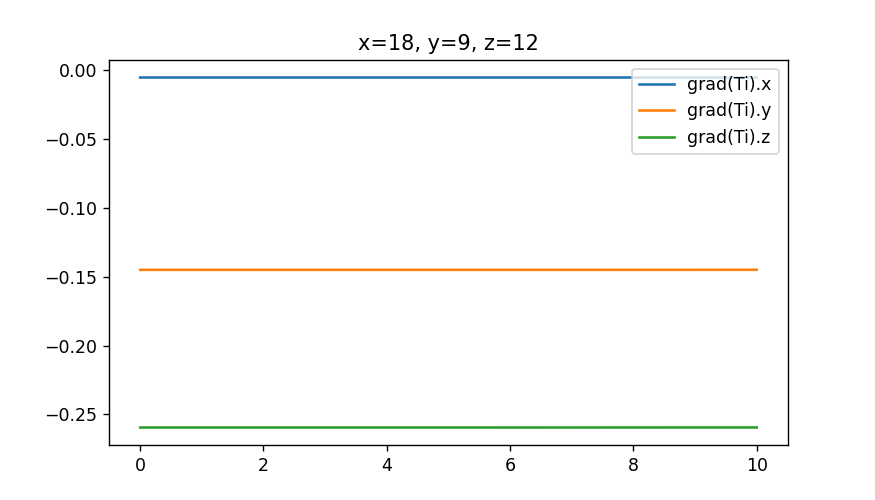

<IPython.core.display.Javascript object>


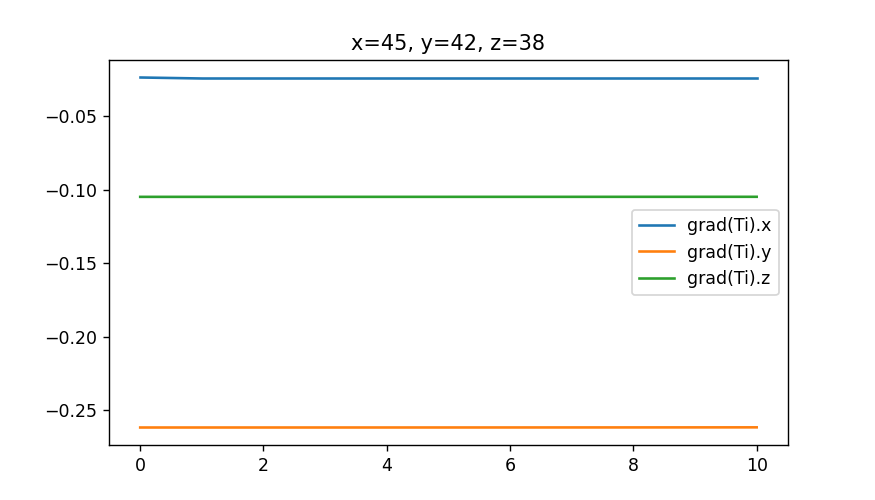

<IPython.core.display.Javascript object>


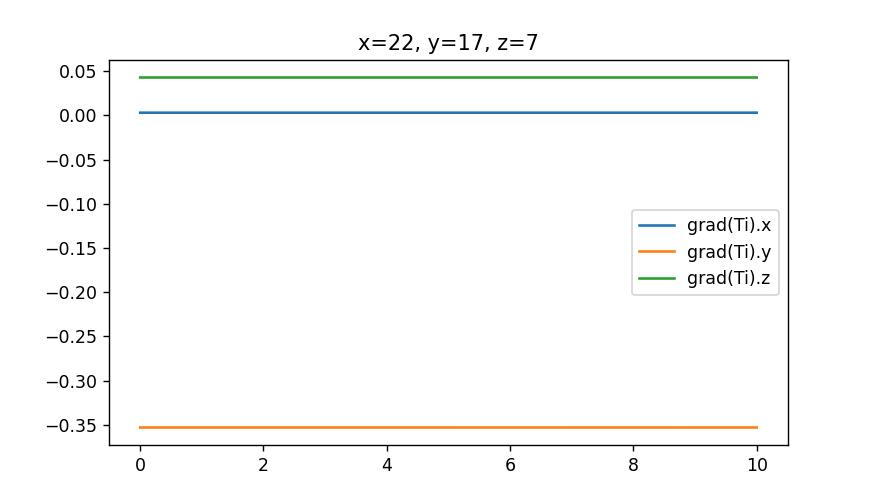

In [24]:
# plot the components of the grad Ti at random points
plt.figure()
plt.plot(check_grad_Ti_x[:, 18, 9, 12], label='grad(Ti).x')
plt.plot(check_grad_Ti_y[:, 18, 9, 12], label='grad(Ti).y')
plt.plot(check_grad_Ti_z[:, 18, 9, 12], label='grad(Ti).z')
plt.legend()
plt.title('x=18, y=9, z=12')
plt.show()

plt.figure()
plt.plot(check_grad_Ti_x[:, 45, 42, 38], label='grad(Ti).x')
plt.plot(check_grad_Ti_y[:, 45, 42, 38], label='grad(Ti).y')
plt.plot(check_grad_Ti_z[:, 45, 42, 38], label='grad(Ti).z')
plt.legend()
plt.title('x=45, y=42, z=38')
plt.show()

plt.figure()
plt.plot(check_grad_Ti_x[:, 22, 17, 7], label='grad(Ti).x')
plt.plot(check_grad_Ti_y[:, 22, 17, 7], label='grad(Ti).y')
plt.plot(check_grad_Ti_z[:, 22, 17, 7], label='grad(Ti).z')
plt.legend()
plt.title('x=22, y=17, z=7')
plt.show()